<a href="https://colab.research.google.com/github/SohiniChat/MLPractise/blob/main/Stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily stock prices of 5 consumer good companies from 1st Oct 2022 to 14th March 2023 - 


---
*   Brittania
*   Godrej Consumer Products Ltd
*   Hindustan Uniliver Ltd
*   Tata Consumer Products Ltd
*   Dabur

In [2]:
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn


In [38]:
brittania_df = pd.read_csv('/content/Brittania.csv', parse_dates=['Date'])
godrej_df = pd.read_csv('/content/Godrej.csv', parse_dates=['Date'])
tata_df = pd.read_csv('/content/Tata Consumer.csv', parse_dates=['Date'])
dabur_df = pd.read_csv('/content/Dabur.csv', parse_dates=['Date'])
HUL_df = pd.read_csv('/content/HUL.csv', parse_dates=['Date'])


Make the date as index and sort on timestamp

In [39]:
brittania_df = brittania_df.set_index(['Date'], drop=True)
brittania_df.sort_index(ascending=True, inplace=True)
godrej_df = godrej_df.set_index(['Date'], drop=True)
godrej_df.sort_index(ascending=True, inplace=True)
tata_df = tata_df.set_index(['Date'], drop=True)
tata_df.sort_index(ascending=True, inplace=True)
dabur_df = dabur_df.set_index(['Date'], drop=True)
dabur_df.sort_index(ascending=True, inplace=True)
HUL_df = HUL_df.set_index(['Date'], drop=True)
HUL_df.sort_index(ascending=True, inplace=True)

Select only Open and Close price columns

In [40]:
brittania_df = brittania_df[['Open Price','Close Price']]
godrej_df = godrej_df[['Open Price','Close Price']]
dabur_df = dabur_df[['Open Price','Close Price']]
tata_df = tata_df[['Open Price','Close Price']]
HUL_df = HUL_df[['Open Price','Close Price']]

Calculate daily gains

In [41]:
brittania_df["gain"] = ((brittania_df['Close Price'] - brittania_df['Open Price']) / brittania_df['Open Price']) * 100
tata_df["gain"] = ((tata_df['Close Price'] - tata_df['Open Price']) / tata_df['Open Price']) * 100
dabur_df["gain"] = ((dabur_df['Close Price'] - dabur_df['Open Price']) / dabur_df['Open Price']) * 100
godrej_df["gain"] = ((godrej_df['Close Price'] - godrej_df['Open Price']) / godrej_df['Open Price']) * 100
HUL_df["gain"] = ((HUL_df['Close Price'] - HUL_df['Open Price']) / HUL_df['Open Price']) * 100

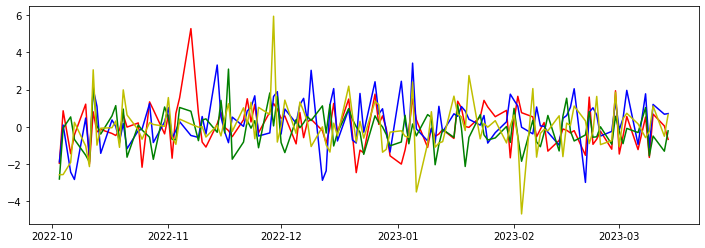

In [42]:
plt.figure(figsize = (12, 4))
plt.plot( brittania_df.gain, 'r' );
plt.plot( godrej_df.gain, 'b');
plt.plot( tata_df.gain, 'g');
plt.plot( dabur_df.gain, 'y');

Calculating min and max gains

In [24]:
brittania_df.gain.min(), brittania_df.gain.max()


(-2.4558498896247243, 5.2655654383735655)

In [43]:
godrej_df.gain.min(), godrej_df.gain.max()

(-2.9793695674939715, 3.415816470322988)

In [25]:
dabur_df.gain.min(), dabur_df.gain.max()

(-4.669225961967678, 5.928571428571437)

In [67]:
tata_df.gain.min(), tata_df.gain.max()

(-2.798600699650172, 3.0944732183832717)

In [27]:
HUL_df.gain.min(), HUL_df.gain.max()

(-3.1683899556868607, 4.664056755628859)

Histogram plotting

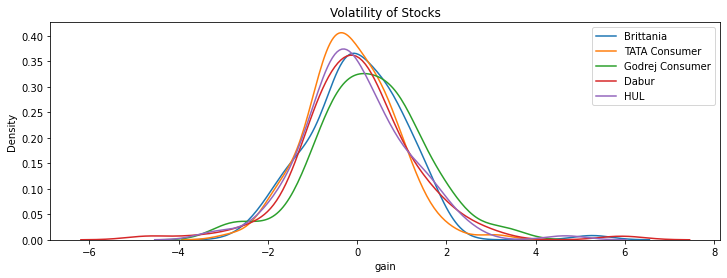

In [45]:
plt.figure(figsize = (12, 4))
plt.title('Volatility of Stocks');
sn.kdeplot(brittania_df.gain, label='Brittania');
sn.kdeplot(tata_df.gain, label='TATA Consumer');
sn.kdeplot(godrej_df.gain, label='Godrej Consumer');
sn.kdeplot(dabur_df.gain, label='Dabur');
sn.kdeplot(HUL_df.gain, label='HUL');
plt.legend();

**Confidence Interval**

In [50]:
from scipy import stats
brittania_ci_95 = stats.norm.interval(0.95,loc=brittania_df.gain.mean(),scale=brittania_df.gain.std())
godrej_ci_95 = stats.norm.interval(0.95,loc=godrej_df.gain.mean(),scale=godrej_df.gain.std())
tata_ci_95 = stats.norm.interval(0.95,loc=tata_df.gain.mean(),scale=tata_df.gain.std())
dabur_ci_95 = stats.norm.interval(0.95,loc=dabur_df.gain.mean(),scale=dabur_df.gain.std())
HUL_ci_95 = stats.norm.interval(0.95,loc=HUL_df.gain.mean(),scale=HUL_df.gain.std())

In [53]:
invest_amt = 100000
brittania_var = invest_amt * brittania_ci_95[0] / 100
brittania_var

-2145.3238913903333

In [54]:
invest_amt = 100000
godrej_var = invest_amt * godrej_ci_95[0] / 100
godrej_var

-2112.182856346188

In [55]:
invest_amt = 100000
tata_var = invest_amt * tata_ci_95[0] / 100
tata_var

-2045.1285378452965

In [56]:
invest_amt = 100000
dabur_var = invest_amt * dabur_ci_95[0] / 100
dabur_var

-2548.0074319984637

In [57]:
invest_amt = 100000
HUL_var = invest_amt * HUL_ci_95[0] / 100
HUL_var

-2341.4364160837385

With an investment of 1 lakh rupees, the Value at Risk for 95% CI is -

*   Brittania : Rs.2145.32
*   Godrej Consumer : Rs.2112.18
*   Tata Consumer : Rs.2045.12
*   Dabur : Rs. 2548
*   Hindustan Uniliver : Rs. 2341.43





**Cumulative Distribution Function**

In [60]:
1 - stats.norm.cdf(4.0,loc=brittania_df.gain.mean(),scale=brittania_df.gain.std())

0.00014562166154363787

In [61]:
1 - stats.norm.cdf(4.0,loc=godrej_df.gain.mean(),scale=godrej_df.gain.std())

0.0010252997264043051

In [70]:
stats.norm.cdf(4.0,loc=tata_df.gain.mean(),scale=tata_df.gain.std())

0.9999912809941972

In [65]:
1 - stats.norm.cdf(4.0,loc=dabur_df.gain.mean(),scale=dabur_df.gain.std())

0.001103272092869978

In [66]:
1 - stats.norm.cdf(4.0,loc=HUL_df.gain.mean(),scale=HUL_df.gain.std())

0.00028524884717218146

Probability of making 4% gain in each stock -


*   Brittania : 0.0145%
*   Godrej : 0.102%
*   Tata Consumer Products Ltd : 0.0001%
*   Dabur : 0.11%
*   HUL : 0.028%
